In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Reshape
from keras.models import Sequential
from keras.datasets.mnist import load_data
from keras.optimizers import Adam

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

n_train_size = X_train.shape[0]
n_test_size = X_test.shape[0]  

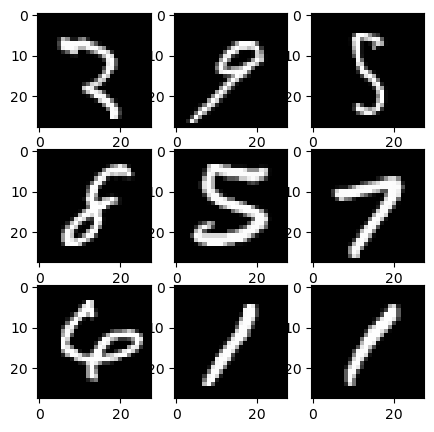

In [25]:
n_rows = 3
n_cols = 3
n_shift = 500

f, a = plt.subplots(n_rows, n_cols, figsize=(5,5))

for i in range(n_rows):
   for j in range(n_cols):
       i_image = n_shift+i*n_cols+j 
       a[i][j].imshow(X_train[i_image,:,:], cmap='gray')

plt.show()

In [7]:
entrada = 784    # 28x28 píxeles aplanados
oculta = 98    
salida = entrada 
learning_rate = 0.005
epochs = 30  

In [13]:
modelo = Sequential()

modelo.add(Flatten(input_shape=(28,28)))   
modelo.add(Dense(oculta))          
modelo.add(Dense(salida))                 
modelo.add(Reshape((28,28)))            

modelo.compile(loss="mse", optimizer=Adam(learning_rate=learning_rate))

modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 98)                  │          76,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │          77,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,546 (603.70 KB)

 Trainable params: 154,546 (603.70 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
X_train_scaled = X_train/255.0

modelo.fit(X_train_scaled, X_train_scaled, epochs=epochs)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0159
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0081
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0081
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0083
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0082
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0081
Epoch 15/30
1875/1875 ━━━━━━

In [17]:
modelo2 = Sequential()

modelo2.add(Flatten(input_shape=(28,28)))   
modelo2.add(Dense(oculta))                  

weights = modelo.layers[1].get_weights()

modelo2.layers[1].set_weights(weights)

In [19]:
vec_lat = modelo2.predict(X_train_scaled)
print(vec_lat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
[[ 0.05402417  0.20579965  0.6750771  ...  0.36109242  0.2549316
  -0.05129464]
 [-0.1260177   0.05134721 -0.3580572  ... -0.35739008 -0.438422
  -0.07425273]
 [-1.3881981  -0.28449565  0.32000905 ... -0.12084752  0.13419655
  -0.30084243]
 ...
 [-0.307711    0.3768417  -0.07591528 ...  0.52689004  0.200645
  -0.29547623]
 [-0.21000203  0.06488616 -0.3552161  ... -0.34130853 -0.13531587
  -0.21946438]
 [-0.06115489 -0.45554715  0.02190891 ...  0.30084726  0.02093598
  -0.21795063]]


In [21]:
modelo3 = Sequential()

modelo3.add(Dense(salida, input_shape=(oculta,)))  
modelo3.add(Reshape((28,28)))               

modelo3.summary()

weights = modelo.layers[2].get_weights()

modelo3.layers[0].set_weights(weights)

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 784)                 │          77,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,616 (303.19 KB)

 Trainable params: 77,616 (303.19 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


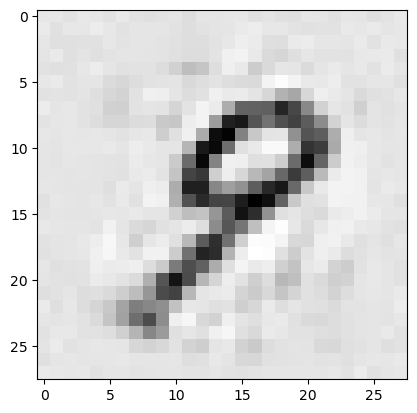

In [27]:
vl = vec_lat[501] 
vl = np.expand_dims(vl, axis=0) 

salida = modelo3.predict(vl)

salida = np.squeeze(salida) 
salida = salida*255  

plt.imshow(salida, cmap='Greys')
plt.show()